In [1]:
#!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time
from catboost import Pool
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
test = pd.read_csv('./data/test.csv')

In [4]:
df = pd.read_pickle('./data/data_1.pkl')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8032887 entries, 827691 to 8860577
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   month_id                    int8   
 1   shop_id                     int8   
 2   item_id                     int16  
 3   cnt_month                   float32
 4   city_id                     int8   
 5   cat_id                      int8   
 6   main_cat                    int8   
 7   sub_cat                     int8   
 8   year                        int16  
 9   month                       int8   
 10  sales_month                 int8   
 11  cnt_month_1                 float32
 12  cnt_month_2                 float32
 13  cnt_month_3                 float32
 14  item_id_mean_cnt_1          float32
 15  item_id_mean_cnt_2          float32
 16  item_id_mean_cnt_3          float32
 17  sub_cat_mean_cnt_1          float32
 18  sub_cat_mean_cnt_2          float32
 19  sub_cat_mean_cnt

In [6]:
df.head()

,month_id,shop_id,item_id,cnt_month,city_id,cat_id,main_cat,sub_cat,year,month,...,sub_cat_mean_cnt_3,price_mean_mean_cnt_1,price_mean_mean_cnt_2,price_mean_mean_cnt_3,item_id/city_id_mean_cnt_1,item_id/city_id_mean_cnt_2,item_id/city_id_mean_cnt_3,shop_id/cat_id_mean_cnt_1,shop_id/cat_id_mean_cnt_2,shop_id/cat_id_mean_cnt_3
827691,3,25,8092,3.0,13,40,11,6,2013,4,...,0.0,1.400024,1.365631,0.0,1.000000,2.142857,0.0,1.087262,1.048394,0.0
827692,3,25,7850,3.0,13,30,8,54,2013,4,...,0.0,1.479122,1.464680,0.0,3.714286,2.285714,0.0,3.651685,2.276650,0.0
827693,3,25,8051,3.0,13,66,14,47,2013,4,...,0.0,0.000000,0.000000,0.0,0.000000,0.428571,0.0,1.827586,1.389474,0.0
827694,3,25,8088,1.0,13,55,13,4,2013,4,...,0.0,1.479122,0.000000,0.0,0.285714,0.000000,0.0,0.598291,0.562107,0.0
827695,3,25,8089,1.0,13,55,13,4,2013,4,...,0.0,0.000000,0.000000,0.0,0.571429,0.000000,0.0,0.598291,0.562107,0.0


In [7]:
# train/validation/test data split
X_train = df[df['month_id'] < 33].drop(['cnt_month'], axis=1)
Y_train = df[df['month_id'] < 33]['cnt_month']

X_valid = df[df['month_id'] == 33].drop(['cnt_month'], axis=1)
Y_valid = df[df['month_id'] == 33]['cnt_month']

X_test = df[df['month_id'] == 34].drop(['cnt_month'], axis=1)

In [8]:
Y_valid.shape, X_test.shape

((221802,), (214200, 28))

In [9]:
model = CatBoostRegressor(
    max_depth=10,              # 트리의 최대 깊이
    n_estimators = 1000,       # 최대 트리 수
    eta = 0.3,                 # 학습률 : 증감률을 줄이는데 사용
    random_seed=123           # 훈련에 사용되는 랜덤 시드
    )

model.fit(
    X_train, Y_train, 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)],  # 유효성 검사 데이터 세트
    cat_features=[],                                   # 범주형 데이터 설정     
    verbose=True,                                      # True : 상세로그수준 / False : 자동로그수준 / int : 상세로그수준을 사용, 매개변수로 로깅기간 사용 
    early_stopping_rounds = 30                         # 반복횟수 설정
    )

0:	learn: 2.9830265	test: 2.9830265	test1: 2.0481177	best: 2.0481177 (0)	total: 2.71s	remaining: 45m 10s
1:	learn: 2.7066108	test: 2.7066108	test1: 1.7436045	best: 1.7436045 (1)	total: 5.32s	remaining: 44m 15s
2:	learn: 2.5116015	test: 2.5116015	test1: 1.6010193	best: 1.6010193 (2)	total: 7.98s	remaining: 44m 13s
3:	learn: 2.3769164	test: 2.3769164	test1: 1.5017412	best: 1.5017412 (3)	total: 10.8s	remaining: 44m 58s
4:	learn: 2.2880706	test: 2.2880706	test1: 1.4633217	best: 1.4633217 (4)	total: 13.7s	remaining: 45m 21s
5:	learn: 2.2340764	test: 2.2340764	test1: 1.4531286	best: 1.4531286 (5)	total: 16.5s	remaining: 45m 40s
6:	learn: 2.1801907	test: 2.1801907	test1: 1.5060245	best: 1.4531286 (5)	total: 19.4s	remaining: 45m 51s
7:	learn: 2.1556633	test: 2.1556633	test1: 1.4972515	best: 1.4531286 (5)	total: 22.3s	remaining: 46m 1s
8:	learn: 2.1285579	test: 2.1285579	test1: 1.4923003	best: 1.4531286 (5)	total: 25.1s	remaining: 46m
9:	learn: 2.0999552	test: 2.0999552	test1: 1.4997953	best: 1

In [10]:
Y_pred = model.predict(X_valid)

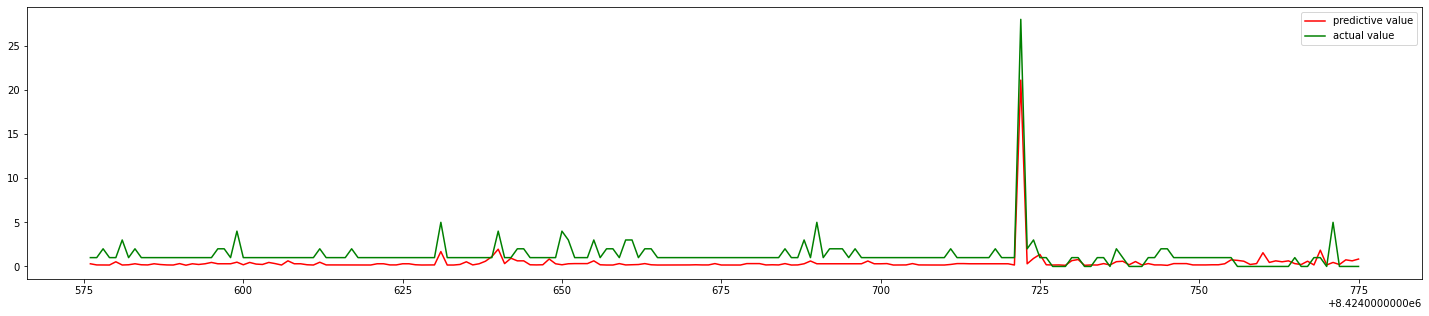

In [11]:
submission = pd.DataFrame({
    "ID": X_valid.index, 
    "item_cnt_month": Y_pred
})
x = submission['ID'].head(200)
y_pred = submission['item_cnt_month'].head(200)
y_true = Y_valid.head(200)
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(111)
ax.plot(x, y_pred, label = 'predictive value', color = 'red')
ax.plot(x, y_true, label = 'actual value', color = 'green')

ax.legend()

plt.show()

In [12]:
Y_test = model.predict(X_test)

In [13]:
# 제출 파일 생성
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('./submission/submission_CatBoost_2022022402.csv', index=False)